<a href="https://colab.research.google.com/github/AlcoholWolf/PY-SAVE/blob/main/ch01_05_DNN%EA%B8%B0%EC%B4%88_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.05. 딥러닝 다중 분류 모델
---
* 날짜:
* 이름:

## 학습내용
    - 딥러닝을 이용한 멀티클래스 분류 진행
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측
    
## 학습자료

* 모두의딥러닝
* 데이터
  * `iris.csv`
  * MNIST 데이터셋


```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/py model')
from setting_import import *
from setting_from import *

TemoBot | import numpy as np
TemoBot | import matplotlib.pyplot as plt
TemoBot | import pandas as pd
TemoBot | plt.style.use('dark_background')
TemoBot | import warnings / action='ignore' 
TemoBot | from sklearn.preprocessing import StandardScaler
TemoBot | from sklearn.model_selection import train_test_split
TemoBot | from sklearn.tree import DecisionTreeClassifier, plot_tree
TemoBot | from sklearn.datasets import load_iris
TemoBot | from sklearn.linear_model import LogisticRegression
TemoBot | from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
TemoBot | from sklearn.svm import SVC


In [7]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning.git

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 364, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 364 (delta 114), reused 120 (delta 78), pack-reused 178
Receiving objects: 100% (364/364), 22.37 MiB | 25.20 MiB/s, done.
Resolving deltas: 100% (149/149), done.


In [12]:
csv_path = '/content/SkillTreePython-DeepLearning/dataset/iris.csv'
df = pd.read_csv(csv_path, header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 아이리스 꽃 종류 예측
---


```
- 0 sepal_length  꽃받침 길이
- 1 sepal_width 꽃받침 너비
- 2 petal_length 꽃임 길이
- 3 petal_width 꽃잎 너비
- 4 species 꽃의 종류 {setosa, versicolor virginica}
```
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-01.PNG?raw=true width=550>
</p>


In [13]:
sns.barplot('alldata')

ValueError: ignored

In [1]:
from sklearn.preprocessing import *
from sklearn.model_selection import *

In [19]:
def x_shape_list(x_list):
    for index in x_list:
        print(f'index : {index.shape}')

In [114]:
def iris_preprocess(df):
    # x-y 분할
    x = df.values[:, :-1] # (전체 샘플, 마지막 변수 전 까지)
    y = df.values[:, -1] # (전체샘플, 마지막 변수)

    # 정규화
    ss = StandardScaler()
    x = ss.fit_transform(x)

    # 원-핫 (y 데이터만)
    oh = OneHotEncoder(sparse=False)
    y = oh.fit_transform(np.expand_dims(y, 1)) # 인풋이 무조건 행렬 (150, ) ▷ (150, 1)
    print(f'OneHotEncoder Index : {oh.categories}')

    # train/test 분할
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = iris_preprocess(df)
x_shape_list([x_train, x_test, y_train, y_test])

print(x_train[0], y_train[0])

OneHotEncoder Index : auto
index : (112, 4)
index : (38, 4)
index : (112, 3)
index : (38, 3)
[-0.90068117  1.72626612 -1.05694388 -1.05003079] [1. 0. 0.]


* 예측값 분포 확인

Text(0.5, 1.0, 'test dataset')

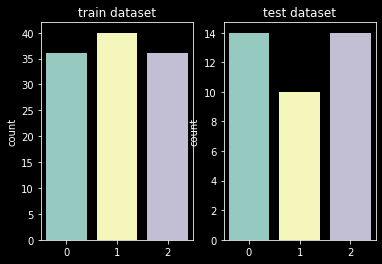

In [115]:
plt.subplot(121);sns.countplot(x=np.argmax(y_train, axis=1));plt.title('train dataset')
plt.subplot(122);sns.countplot(x=np.argmax(y_test, axis=1));plt.title('test dataset')

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-02.PNG?raw=true width=800>
</p>


#### **모델 생성**

In [116]:
from tensorflow.keras import models, layers, utils

In [117]:
def Build_Model():
    x = layers.Input(shape=(4,))
    y = layers.Dense(12, activation='relu')(x)
    y = layers.Dense(8, activation='relu')(y)
    y = layers.Dense(3, activation='softmax')(y)
    Model = models.Model(x, y)
    return Model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_54 (Dense)            (None, 12)                60        
                                                                 
 dense_55 (Dense)            (None, 8)                 104       
                                                                 
 dense_56 (Dense)            (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


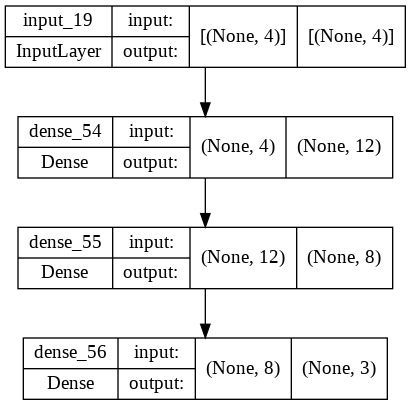

In [118]:
model1 = Build_Model()
model1.summary()
utils.plot_model(model1, show_shapes=True)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 
    * categorical_crossentropy : '원-핫 완료 상태'
    * sparse_categorical_crossentropy : '원-핫 안된 상태'
* `optimizer` : 
* `metrics`: 


In [119]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [120]:
model1.fit(x_train, y_train, epochs=50, batch_size=4)

Epoch 1/50
28/28 [==============================] - 0s 1ms/step - loss: 1.1965 - accuracy: 0.2500
Epoch 2/50
28/28 [==============================] - 0s 1ms/step - loss: 1.0765 - accuracy: 0.4464
Epoch 3/50
28/28 [==============================] - 0s 1ms/step - loss: 0.9815 - accuracy: 0.6429
Epoch 4/50
28/28 [==============================] - 0s 1ms/step - loss: 0.8921 - accuracy: 0.7143
Epoch 5/50
28/28 [==============================] - 0s 1ms/step - loss: 0.8054 - accuracy: 0.7589
Epoch 6/50
28/28 [==============================] - 0s 1ms/step - loss: 0.7211 - accuracy: 0.7857
Epoch 7/50
28/28 [==============================] - 0s 1ms/step - loss: 0.6432 - accuracy: 0.8393
Epoch 8/50
28/28 [==============================] - 0s 1ms/step - loss: 0.5798 - accuracy: 0.8304
Epoch 9/50
28/28 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.8393
Epoch 10/50
28/28 [==============================] - 0s 1ms/step - loss: 0.4901 - accuracy: 0.8571
Epoch 11/50
28/28 [

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [122]:
model1.evaluate(x_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.1719 - accuracy: 0.9474


[0.17190365493297577, 0.9473684430122375]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [123]:
model1.predict(x_test)

array([[9.9951994e-01, 1.3680253e-04, 3.4328119e-04],
       [7.5764692e-04, 6.8006647e-01, 3.1917587e-01],
       [9.9816567e-01, 1.0186047e-03, 8.1578764e-04],
       [9.4905967e-04, 9.5194417e-01, 4.7106791e-02],
       [9.9481118e-01, 3.7155089e-03, 1.4732440e-03],
       [2.6139098e-03, 2.4519865e-01, 7.5218743e-01],
       [6.8738393e-04, 1.5924229e-01, 8.4007031e-01],
       [3.0172077e-07, 1.9018851e-03, 9.9809784e-01],
       [9.9564147e-01, 3.0222917e-03, 1.3362007e-03],
       [9.9982125e-01, 4.7217942e-05, 1.3164002e-04],
       [6.3443137e-04, 9.7978759e-01, 1.9578010e-02],
       [1.4781789e-04, 5.0048684e-03, 9.9484730e-01],
       [1.1410904e-04, 2.3200182e-02, 9.7668570e-01],
       [1.0772011e-03, 7.9698074e-01, 2.0194207e-01],
       [2.6680322e-04, 5.6879926e-02, 9.4285327e-01],
       [8.4442647e-05, 6.5098889e-03, 9.9340570e-01],
       [3.4623044e-03, 2.6734465e-01, 7.2919309e-01],
       [3.4206966e-04, 4.0850397e-02, 9.5880753e-01],
       [6.0182363e-05, 9.835

* 예측 시각화

## 과제
---

### | 과제1. 이진분류 문제 정리

* 예측값의 범위 :
* 예측값의 shape :
* 아웃풋 레이어의 노드 개수 : 
* 아웃풋 레이어의 activation :
* 손실함수 (loss) : 
* 평가함수 (metrics) : 

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

### | 과제 3. MNIST 숫자 데이터 분류

```
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
```

In [102]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 정규화 x
x_train = x_train/255.  # 0 ~ 1
x_test = x_test/255. # 0 ~ 1
# 원핫 y -> 안하고 작동시켜보기
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


* 데이터 시각화

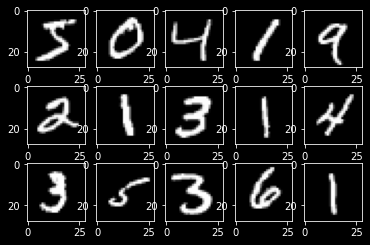

In [103]:
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_train[i], cmap='gray')

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-03.PNG?raw=true width=500>
</p>


#### **모델 생성**

In [43]:
from tensorflow.keras import models, layers, utils

In [108]:
def Build_MNISTModel():
    x = layers.Input(shape=(28, 28))
    y = layers.Flatten()(x)
    y = layers.Dense(784, activation='relu')(x)
    y = layers.Dense(10, activation='softmax')(y)
    Model = models.Model(x, y)
    return Model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 dense_52 (Dense)            (None, 28, 784)           22736     
                                                                 
 dense_53 (Dense)            (None, 28, 10)            7850      
                                                                 
Total params: 30,586
Trainable params: 30,586
Non-trainable params: 0
_________________________________________________________________


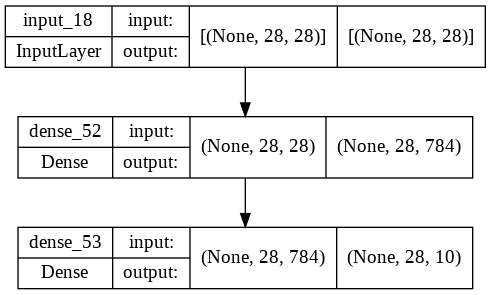

In [109]:
MOD = Build_MNISTModel()
MOD.summary()
utils.plot_model(MOD, show_shapes=True)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 
* `optimizer` : 
* `metrics`: 


In [112]:
MOD.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [113]:
MOD.fit(x_train, y_train, epochs=50, batch_size=20)

Epoch 1/50


ValueError: ignored

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

* 예측 시각화

* 모델 활용